In [73]:
import sys
sys.path.append("../")
import pandas as pd
from scipy import stats
import numpy as np
from utils.data_utils import DataLoader
from utils.feature_association import FeatureAssociation

from utils import visualization

from importlib import reload
reload(visualization)

<module 'utils.visualization' from '/home/azeem/Documents/ML-I/ML1-XAI/Project/notebooks/../utils/visualization.py'>

In [2]:
data_loader = DataLoader(file_path='../data/raw/Churn_Modelling.xls' , target_column='Exited', test_size=0.2, random_state=42)

In [3]:
X, y = data_loader.get_data()

In [4]:
df = data_loader.data

In [5]:
df.shape

(10000, 14)

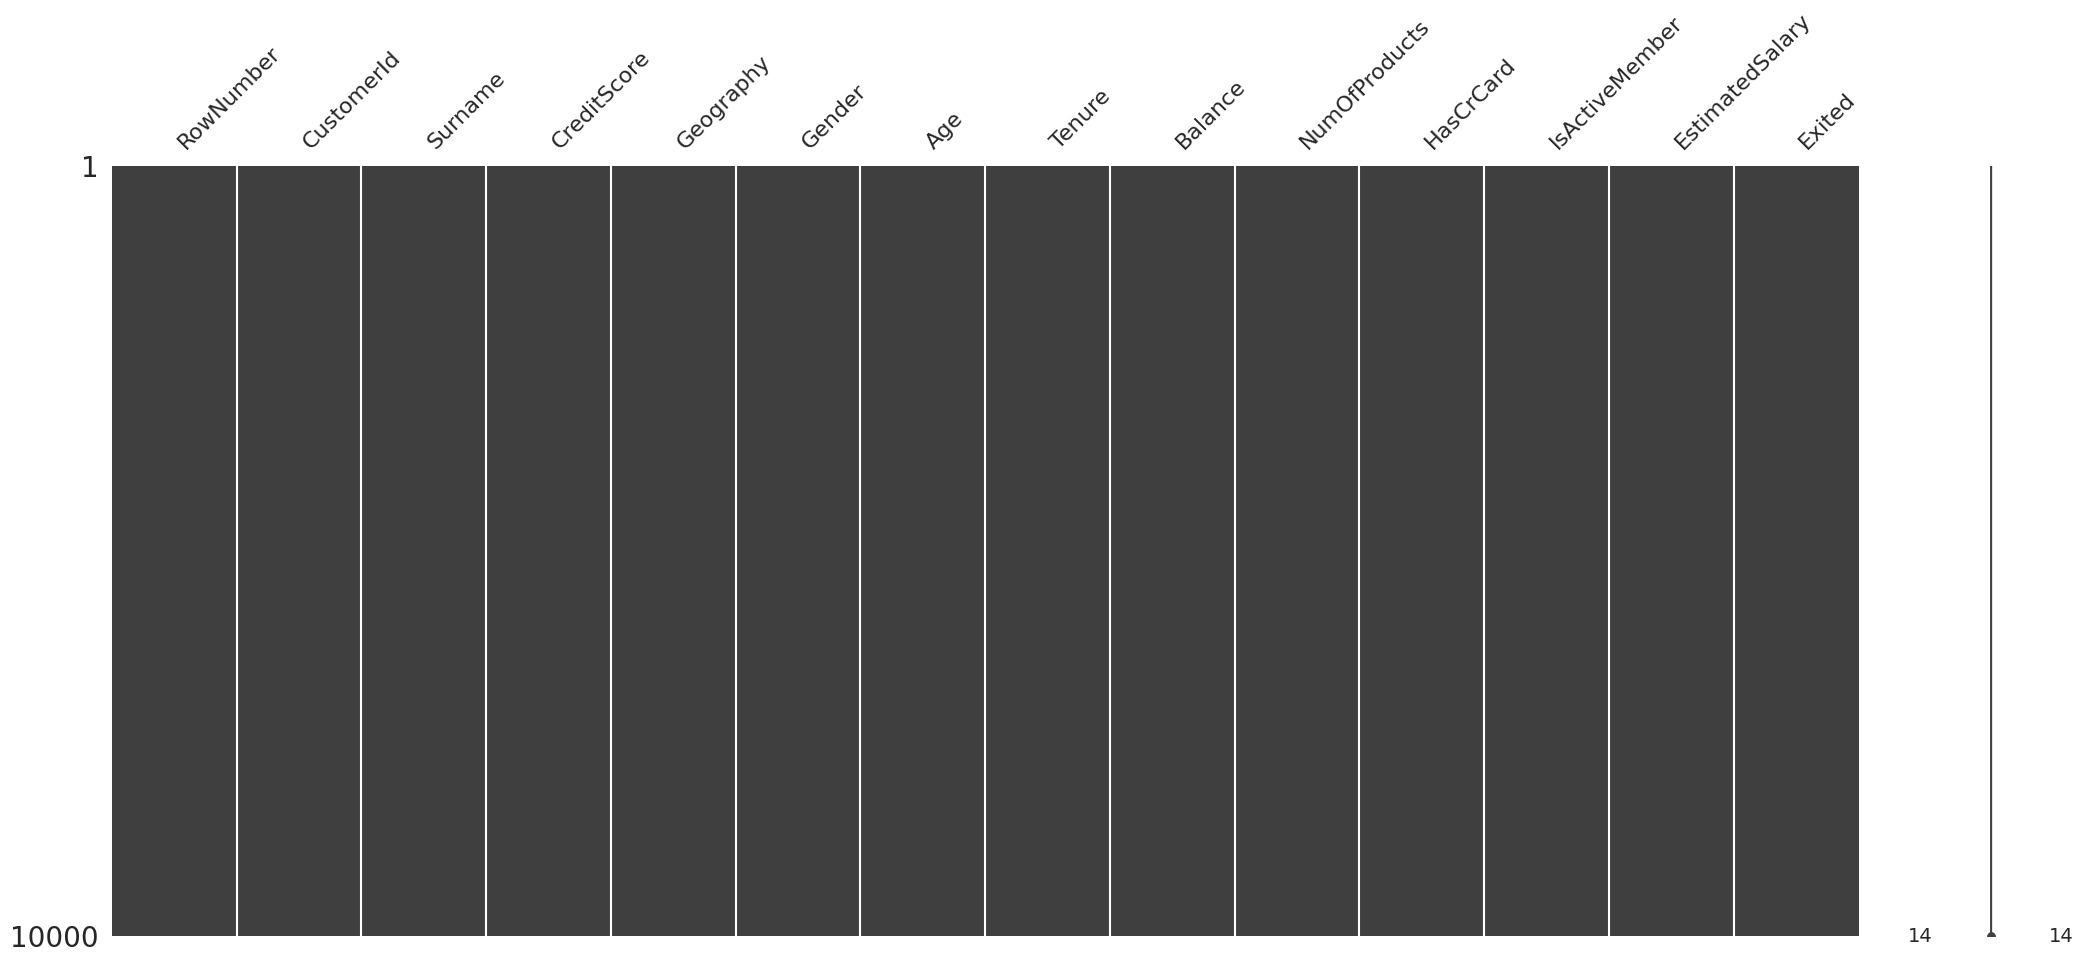

In [6]:
visualization.plot_missing(df)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
cat_col = df.select_dtypes(include='object').columns.tolist()

df[cat_col].nunique().to_frame().rename(columns={0: 'unique_values_count'})

,unique_values_count
Surname,2932
Geography,3
Gender,2


In [10]:
df.drop(['Surname'], axis=1, inplace=True)

In [11]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df[['RowNumber', 'CustomerId']].nunique().to_frame().rename(columns={0: 'unique_values_count'})

,unique_values_count
RowNumber,10000
CustomerId,10000


In [13]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

In [35]:
df.nunique().to_frame().rename(columns={0: 'unique_values_count'})

,unique_values_count
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [51]:
df['NumOfProducts'] = df['NumOfProducts'].astype('category', copy=False)
df['HasCrCard'] = df['HasCrCard'].astype('category', copy=False)
df['IsActiveMember'] = df['IsActiveMember'].astype('category', copy=False)
df['Tenure'] = df['Tenure'].astype('category', copy=False)

In [52]:
cat_col = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [53]:
c = df['Exited'].value_counts()
p = df['Exited'].value_counts(normalize=True).mul(100).round(2)

pd.concat([c, p], axis = 1, keys=['count', '%'])

,count,%
Exited,,
0,7963,79.63
1,2037,20.37


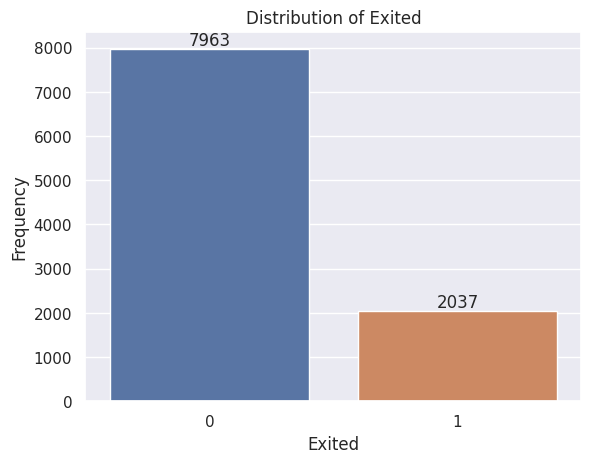

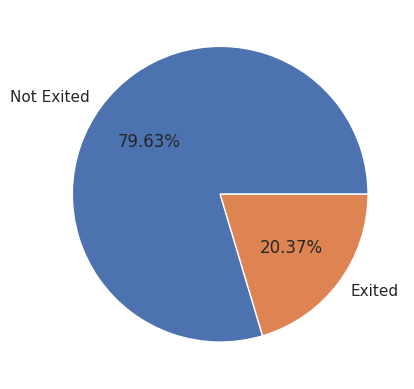

In [54]:
visualization.plot_count(df['Exited'])
visualization.pie_plot(df, 'Exited')

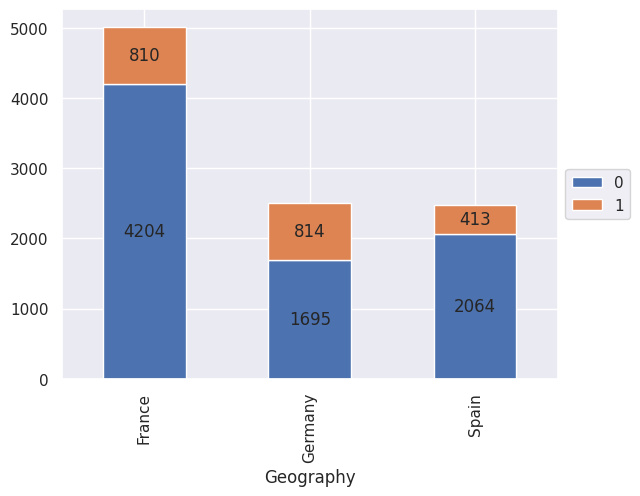

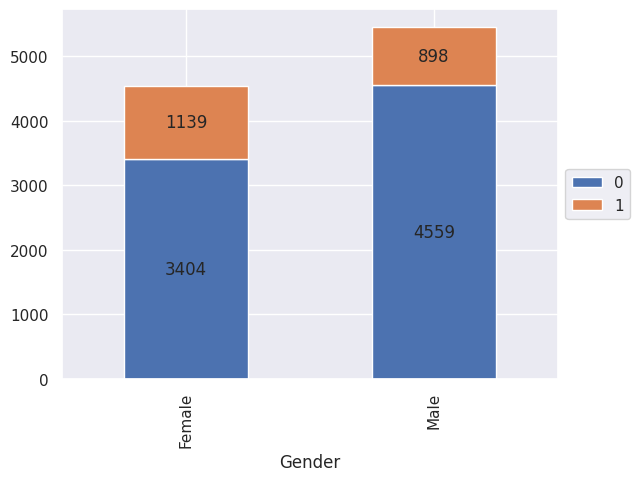

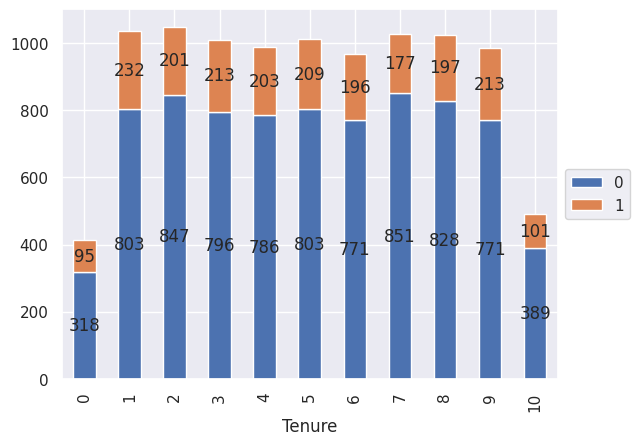

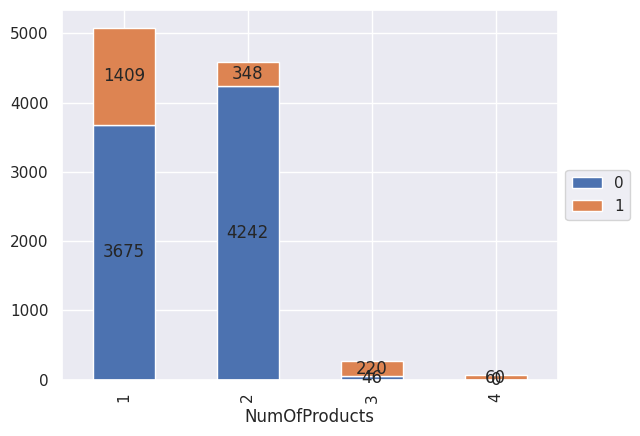

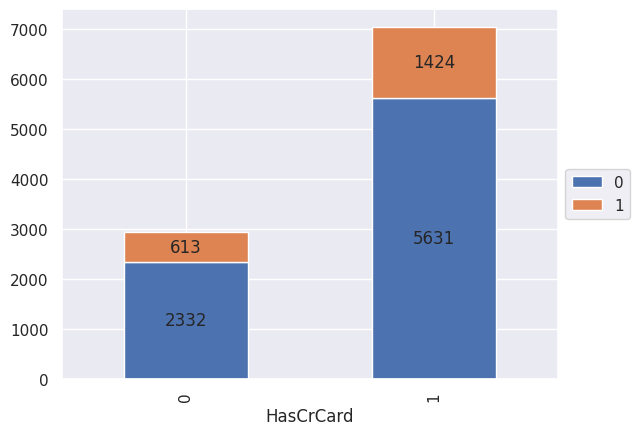

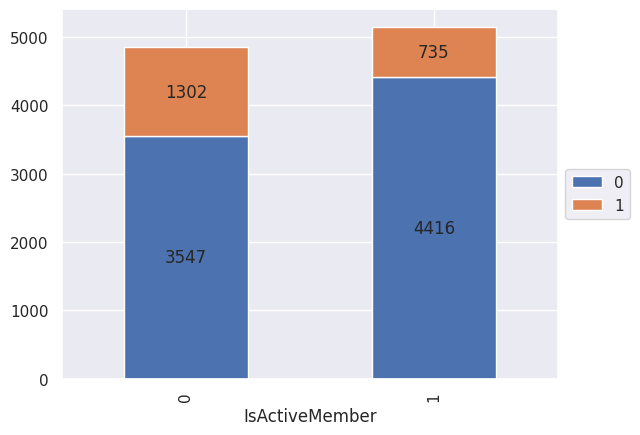

In [55]:
for col in cat_col:
    visualization.crosstab_plot(df, col, 'Exited')

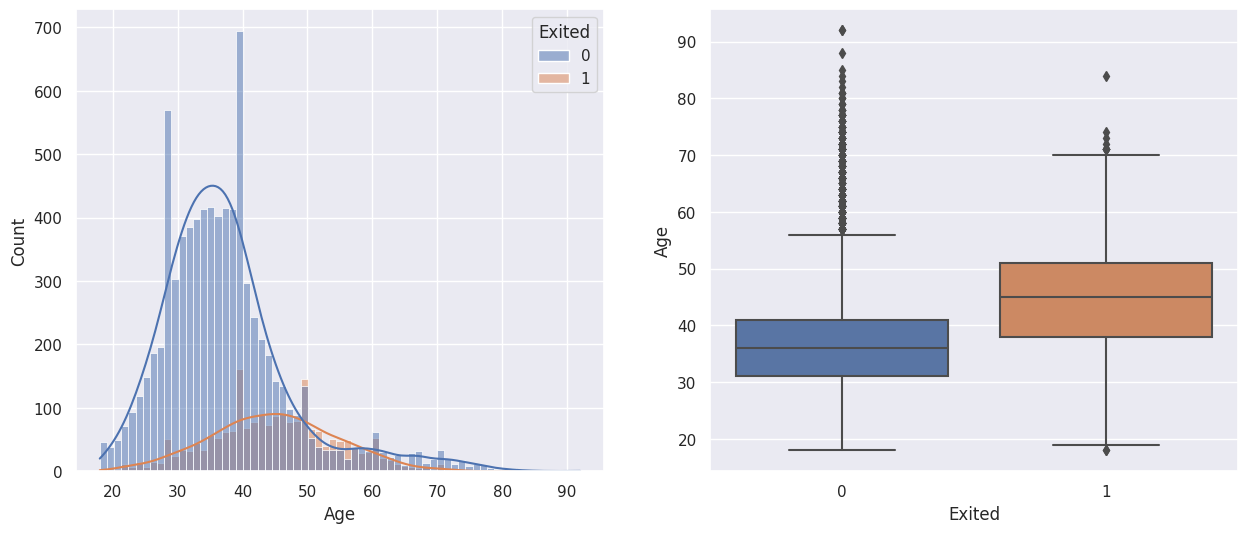

In [68]:
visualization.dist_plot(df, x = 'Age', y = 'Exited')

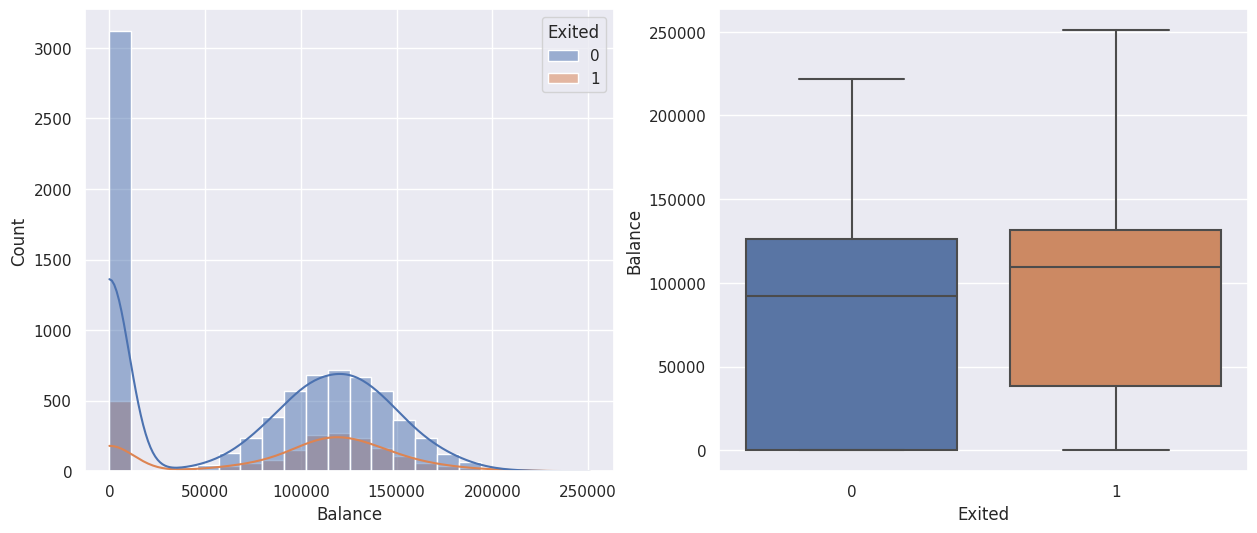

In [69]:
visualization.dist_plot(df, x = 'Balance', y = 'Exited')

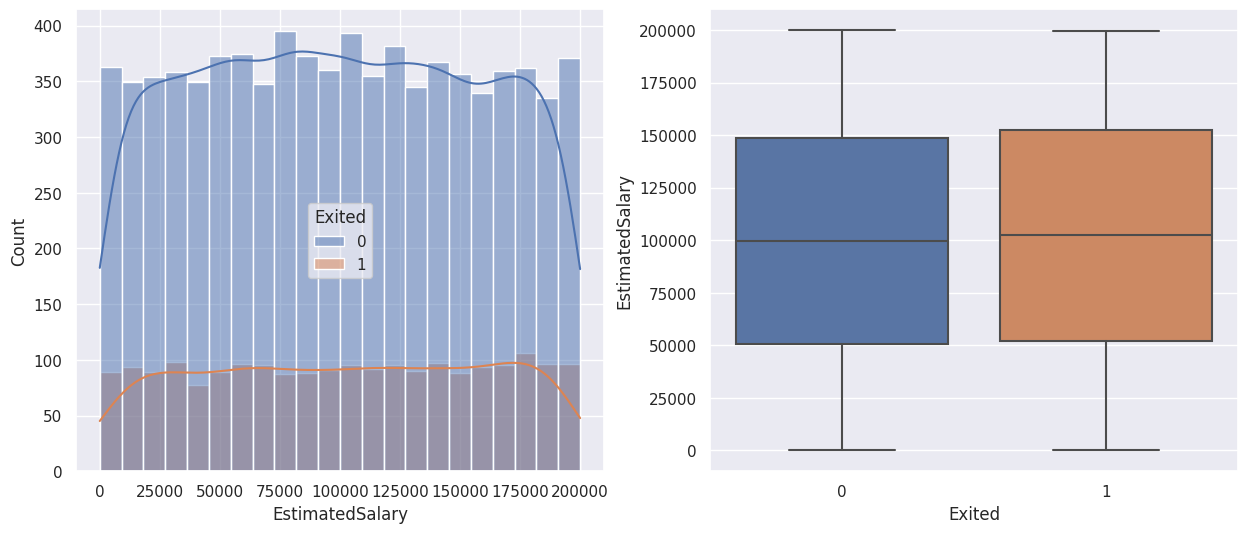

In [71]:
visualization.dist_plot(df, x = 'EstimatedSalary', y = 'Exited')

In [72]:
df.describe()

,CreditScore,Age,Balance,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,0.203700
std,96.653299,10.487806,62397.405202,57510.492818,0.402769
min,350.000000,18.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,97198.540000,100193.915000,0.000000
75%,718.000000,44.000000,127644.240000,149388.247500,0.000000
max,850.000000,92.000000,250898.090000,199992.480000,1.000000


In [78]:
z_score = np.abs(stats.zscore(df['Age']))

df = df[(z_score < 3)]

In [81]:
df.shape

(9867, 11)

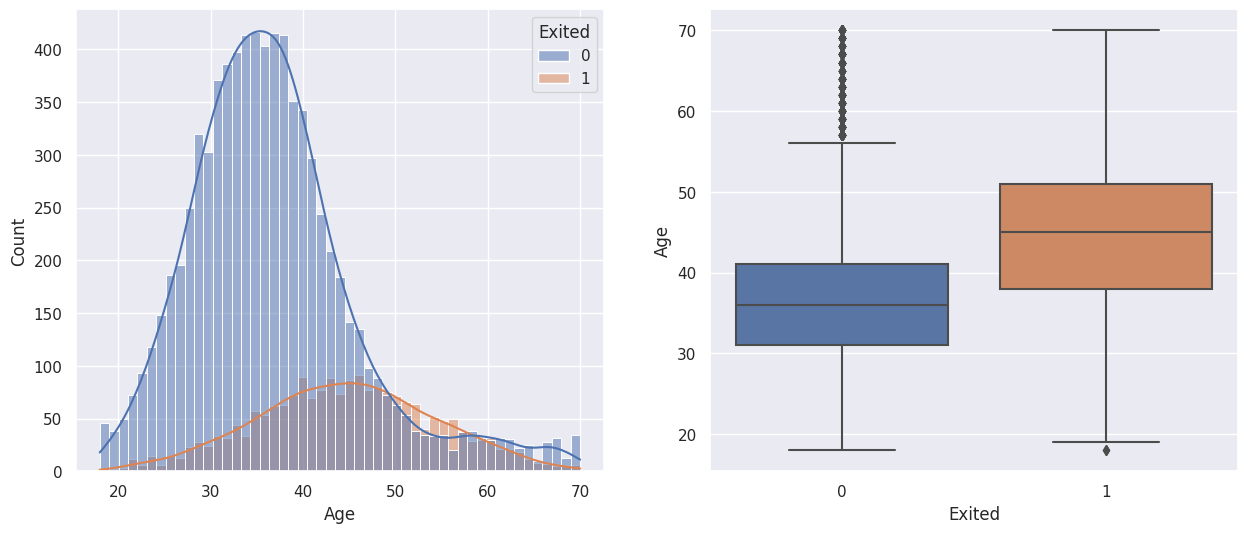

In [80]:
visualization.dist_plot(df, x = 'Age', y = 'Exited')

In [46]:
FeatureAssociation(df).get_df(significant=True)

Significant Associations


,Feature 1,Feature 2,p-value
0,CreditScore,Age,0.0009
1,CreditScore,Exited,0.0492
2,Geography,Gender,0.0315
3,Geography,Age,0.0025
4,Geography,Tenure,0.0248
5,Geography,Balance,0.0000
6,Geography,NumOfProducts,0.0000
7,Geography,Exited,0.0000
8,Gender,Age,0.0112
9,Gender,NumOfProducts,0.0001


In [47]:
FeatureAssociation(df).get_df(significant=False)

Non Significant Associations


,Feature 1,Feature 2,p-value
0,CreditScore,Geography,0.087437
1,CreditScore,Gender,0.379613
2,CreditScore,Tenure,0.411621
3,CreditScore,Balance,0.999881
4,CreditScore,NumOfProducts,0.259272
5,CreditScore,HasCrCard,0.954147
6,CreditScore,IsActiveMember,0.667605
7,CreditScore,EstimatedSalary,0.434577
8,Geography,HasCrCard,0.327051
9,Geography,IsActiveMember,0.070486
